In [2]:
from rossby_waves import *
from math import floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel, vel_den, trajectory_den
from matplotlib.animation import FuncAnimation, PillowWriter

In [3]:
#11x11 rossby waves
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
ro.add_grid_waves(xlim=(-5, 5, 11), ylim=(-5, 5, 11))
ro.remove_wave(0)


In [4]:
#rms of velocity w alpha = 1e-13
v = vel(ro, grid(10), 0)
vel_list = []
for i in v:
    vel_list.append(np.sqrt(i[0]**2 + i[1]**2))
a = np.array(vel_list)
np.sqrt(np.sum(a**2)/len(vel_list))

2.71429785207135e-11

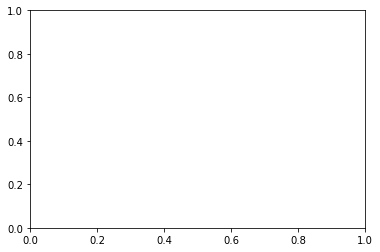

In [4]:
#animation of trajectory of one particle with streamfunction
fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))

x, y = trajectory(ro, np.array([[1,0.1]]), 0, 5e11, 2.5e9, eps=0)
X, Y = np.meshgrid(np.linspace(-np.pi, np.pi, 100), np.linspace(-np.pi, np.pi, 100))
plt.contourf(X, Y, ro.streamfunction(X, Y, 0), 50, cmap="coolwarm")
x_traj, y_traj = [], []
def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()
    for coord_list in x:
        x_traj.append(coord_list[i])
    for coord_list in y:
        y_traj.append(coord_list[i])

    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.contourf(X, Y, ro.streamfunction(X, Y, 0), 50, cmap="coolwarm")
    plt.scatter(x_traj, y_traj, s = 1)
anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)

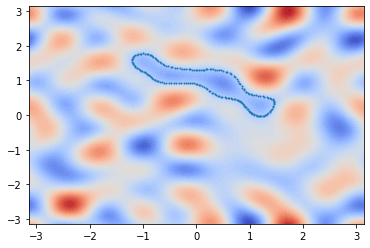

In [20]:
#plot of final trajectory
fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
X, Y = np.meshgrid(np.linspace(-np.pi, np.pi, 100), np.linspace(-np.pi, np.pi, 100))
plt.contourf(X, Y, ro.streamfunction(X, Y, 0), 50, cmap="coolwarm")
plt.scatter(x_traj, y_traj, s = 1)


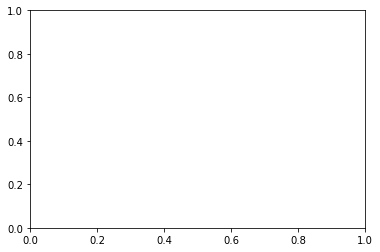

In [6]:
#animation of positions of particles 
x0 = grid(100)
fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
x_list, y_list = trajectory(ro, x0, 0, 10e11, 2.5e9, eps=0.005)

def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()

    x_traj = []
    for coord_list in x_list:
        x_traj.append(coord_list[i])
    y_traj = []
    for coord_list in y_list:
        y_traj.append(coord_list[i])
    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.scatter(x_traj, y_traj, s = 0.1)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x_list[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)

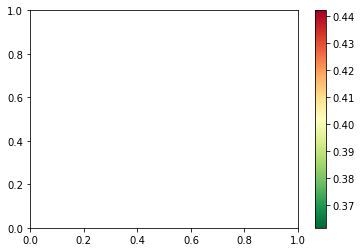

In [17]:
#animation of position of one particle with density
cmap = plt.cm.get_cmap('RdYlGn_r')
n=1
x_list, y_list, rho_list = trajectory_den(ro, np.array([[1, 0, 1]]), 0, 5e11, 2.5e9, eps=0.01)

r = sorted([rho[-1] for rho in rho_list])
M = r[floor(n*n*0.9)]
m = r[0]

fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))

def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()

    x_traj = []
    for coord_list in x_list:
        x_traj.append(coord_list[i])
    y_traj = []
    for coord_list in y_list:
        y_traj.append(coord_list[i])
    rho = []
    for coord_list in rho_list:
        rho.append(coord_list[i])
    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.scatter(x_traj, y_traj, c=rho, cmap=cmap, s=10, vmax=M, vmin=m)
    if i == 0:
        plt.colorbar()

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x_list[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)

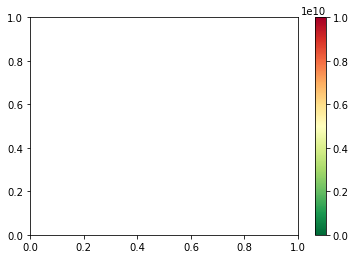

In [150]:
#animation of positions of particles w density
cmap = plt.cm.get_cmap('RdYlGn_r')
n = 100
x0 = grid(n, rho = 1)
x_list, y_list, rho_list = trajectory_den(ro, x0, 0, 10e11, 2.5e9, eps=1)

r = sorted([rho[-1] for rho in rho_list])
M = r[floor(n*n*0.9)]
m = r[0]

fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))

def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()

    x_traj = []
    for coord_list in x_list:
        x_traj.append(coord_list[i])
    y_traj = []
    for coord_list in y_list:
        y_traj.append(coord_list[i])
    rho = []
    for coord_list in rho_list:
        rho.append(coord_list[i])
    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.scatter(x_traj, y_traj, c=rho, cmap=cmap, s=0.1, vmax=1e10, vmin=0)
    if i == 0:
        plt.colorbar()

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x_list[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)

In [142]:
x_list, y_list, rho_list = trajectory_den(ro, x0, 0, 10e11, 2.5e9, eps=1)

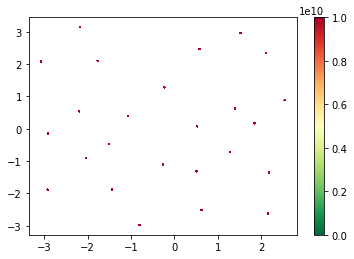

In [154]:
#final plot of particle positions and density
i = 400
x_traj = []
for coord_list in x_list:
    x_traj.append(coord_list[i])
y_traj = []
for coord_list in y_list:
    y_traj.append(coord_list[i])
rho = []
for coord_list in rho_list:
    rho.append(coord_list[i])

ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
plt.scatter(x_traj, y_traj, c=rho, cmap=cmap, s=0.1, vmax=1e10, vmin=0)
plt.colorbar()


In [7]:
#pickle test
import pickle
traj = trajectory(ro, grid(100), 0, 10e11, 2.5e9, eps=0.005)
with open("traj.bin", "wb") as f: # "wb" because we want to write in binary mode
    pickle.dump(traj, f)


In [11]:
with open("traj.bin", 'rb') as f:
    traj2 = pickle.load(f)

In [175]:
#calculate particle trajectories and densities for below
x0 = grid(100, rho=1)
x_0, y_0, rho_0 = trajectory_den(ro, x0, 0, 5e11, 2.5e9, eps=0)
x_01, y_01, rho_01 = trajectory_den(ro, x0, 0, 5e11, 2.5e9, eps=0.01)
x_1, y_1, rho_1 = trajectory_den(ro, x0, 0, 5e11, 2.5e9, eps=1)

In [176]:
x_0001, y_0001, rho_0001 = trajectory_den(ro, x0, 0, 5e11, 2.5e9, eps=0.001)

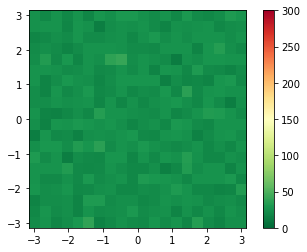

In [199]:
#plotting historgram of frequencies of particles at time step t
t = 200
N = 20 #number of bins
xyrho = [] 
for x, y, rho in zip(x_0, y_0, rho_0):
    xyrho.append((x[t],y[t],rho[t]))

x, y = [point[0] for point in xyrho], [point[1] for point in xyrho]
H, xedges, yedges = np.histogram2d(x, y, bins=[N,N], range=[[-np.pi,np.pi], [-np.pi, np.pi]])
H = H.T
plt.imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cmap, vmax=300, vmin=0)
plt.colorbar()

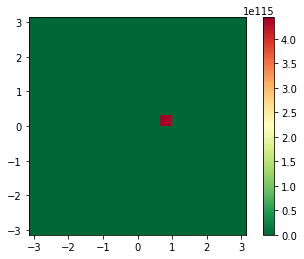

In [226]:
#plotting historgram of densities of particles at time step t
t = 200
N = 20 #number of bins
xyrho = []
for x, y, rho in zip(x_1, y_1, rho_1):
    xyrho.append((x[t],y[t],rho[t]))

x, y, rho = [point[0] for point in xyrho], [point[1] for point in xyrho], [point[2] for point in xyrho]
H, xedges, yedges = np.histogram2d(x, y, weights = rho, bins=[N,N], range=[[-np.pi,np.pi], [-np.pi, np.pi]])
H = H.T
plt.imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cmap)
plt.colorbar()